# Algerian Forest Fires Case Study

The dataset includes 244 instances that regroup a data of some region of Algeria.
The period from June 2012 to September 2012.<br> 
The dataset includes 11 attribues and 1 output attribue (class)<br>

## Attribute Information
1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations 
2. Temp : temperature noon (temperature max)  in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90 
4. Ws :Wind speed in km/h: 6 to 29 
5. Rain: total day in mm: 0 to 16.8
FWI Components  
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5 
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9 
8. Drought Code (DC) index from the FWI system:  7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5 
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely  Fire and Not Fire

## Objective :
1. Data Cleaning and Feature Engineering
2. Exploratory Data Analysis
3. Data Visualization

#### GITHUB LINK: https://github.com/anuraggupta19/Algerian-Forest-Project.git

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

In [2]:
#importing dataset
dataset = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header= 1)
df = dataset.copy()
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [3]:
df.shape

(246, 14)

## 1. Data Cleaning & Feature Engineering

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


#### INSIGHTS: All are categorical columns

### COLUMN: 'day'

In [5]:
# Analysing day Column
df['day'].unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31',
       'Sidi-Bel Abbes Region Dataset', 'day'], dtype=object)

In [6]:
df['day'].isnull().sum()

0

In [7]:
#'Sidi-Bel Abbes Region Dataset'and 'day' are unkown dates, So replacing them-
df['day'] = df['day'].replace('Sidi-Bel Abbes Region Dataset',np.nan)
df['day'] = df['day'].replace('day',np.nan)
df['day'] = df['day'].astype('float')
  
median_day = df['day'].median()                                                                #(replacing with median;16)      
df['day'].fillna(median_day,inplace=True)

In [8]:
df['day'] = df['day'].astype(int)
df['day'].dtype

dtype('int32')

#### Conclusion: Day Column is converted to integer with handling its inappropriate values

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    int32 
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: int32(1), object(13)
memory usage: 26.1+ KB


### COLUMN: 'month'

In [10]:
# Analysing month Column
df['month'].unique()

array(['06', '07', '08', '09', nan, 'month'], dtype=object)

In [11]:
df['month'].value_counts()

07       62
08       62
06       60
09       60
month     1
Name: month, dtype: int64

In [12]:
df['month'].isnull().sum()

1

In [13]:
#month column contains missing value and unknown value 'month', So replacing them-
df['month'] = df['month'].replace('month',np.nan)
df['month'] = df['month'].astype('float')

In [14]:
mode_month=df['month'].mode()
mode_month

0    7.0
1    8.0
Name: month, dtype: float64

In [15]:
# 7 & 8 month are mostly occured, So we can replace with any of them-                             (replacing with mode; month 7)
df['month'].fillna(mode_month[0],inplace=True)
df['month'] = df['month'].astype(int)
df['month'].dtype

dtype('int32')

#### Conclusion: Month Column is converted to integer with handling its inappropriate values

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    int32 
 1   month        246 non-null    int32 
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: int32(2), object(12)
memory usage: 25.1+ KB


### COLUMN: 'year'

In [17]:
df['year'].unique()

array(['2012', nan, 'year'], dtype=object)

In [18]:
df['year'].isnull().sum()

1

In [19]:
# Year Column contain missing values as well as 'year' value but-
# As this Data is collected from The period of June 2012 to September 2012. So year is 2012 & replacing them
df['year'] = df['year'].replace('year',np.nan)
df['year'].fillna(2012,inplace=True)
df['year'] = df['year'].astype(int)

#### Conclusion: Year Column is converted to integer with handling its inappropriate values

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    int32 
 1   month        246 non-null    int32 
 2   year         246 non-null    int32 
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: int32(3), object(11)
memory usage: 24.1+ KB


### COLUMN: 'temperature'

In [21]:
df['Temperature'].unique()

array(['29', '26', '25', '27', '31', '33', '30', '28', '32', '34', '35',
       '36', '37', '22', '24', nan, 'Temperature', '38', '39', '40', '42'],
      dtype=object)

In [22]:
df['Temperature'].isnull().sum()

1

In [23]:
#temperature column contains missing value and unknown value 'Temprature', So replacing them-
mode_temp= df['Temperature'].mode()                                                           
df['Temperature'] = df['Temperature'].replace('Temperature',np.nan) 
df['Temperature'].fillna(mode_temp[0],inplace=True)  #replacing with mode of temperature; 35                                    
df['Temperature'] = df['Temperature'].astype(int)

#### Conclusion: Temperature Column is converted to integer with handling its inappropriate values

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    int32 
 1   month        246 non-null    int32 
 2   year         246 non-null    int32 
 3   Temperature  246 non-null    int32 
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: int32(4), object(10)
memory usage: 23.2+ KB


### COLUMN: 'RH'

In [25]:
df['RH'].unique()

KeyError: 'RH'

In [26]:
#Some Columns are not named correctly-
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [27]:
#'RH', 'Ws','Rain', 'Classes' has space before them,So removing it
df.columns= ['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [28]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [29]:
df['RH'].unique()

array(['57', '61', '82', '89', '77', '67', '54', '73', '88', '79', '65',
       '81', '84', '78', '80', '55', '62', '66', '64', '53', '47', '50',
       '68', '75', '76', '63', '69', '70', '59', '48', '45', '60', '51',
       '52', '58', '86', '74', '71', '49', nan, ' RH', '44', '41', '42',
       '90', '87', '72', '46', '37', '36', '56', '43', '83', '29', '34',
       '33', '35', '39', '31', '21', '40', '24', '38', '26'], dtype=object)

In [30]:
df['RH'].isnull().sum()

1

In [31]:
#RH column contains missing value and unknown value 'RH', So replacing them-
mode_rh = df['RH'].mode()                                                           
df['RH'] = df['RH'].replace(' RH',np.nan) 
df['RH'].fillna(mode_rh[0],inplace=True)  #replacing with mode of RH; 55                                    
df['RH'] = df['RH'].astype(int)

#### Conclusion: RH Column is converted to integer with handling its inappropriate values

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    int32 
 1   month        246 non-null    int32 
 2   year         246 non-null    int32 
 3   Temperature  246 non-null    int32 
 4   RH           246 non-null    int32 
 5   Ws           245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: int32(5), object(9)
memory usage: 22.2+ KB


### COLUMN: 'Ws'

In [33]:
df['Ws'].unique()

array(['18', '13', '22', '16', '14', '15', '12', '19', '21', '20', '17',
       '26', '11', nan, ' Ws', '10', '9', '8', '6', '29'], dtype=object)

In [34]:
df['Ws'].isnull().sum()

1

In [35]:
#Ws column contains missing value and unknown value ' Ws', So replacing them-  
mode_ws=df['Ws'].mode()
df['Ws'] = df['Ws'].replace(' Ws',np.nan) 
df['Ws'].fillna(mode_ws[0],inplace=True)  #replacing with mode of Ws; 14                                  
df['Ws'] = df['Ws'].astype(int)

#### Conclusion: Ws Column is converted to integer with handling its inappropriate values

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    int32 
 1   month        246 non-null    int32 
 2   year         246 non-null    int32 
 3   Temperature  246 non-null    int32 
 4   RH           246 non-null    int32 
 5   Ws           246 non-null    int32 
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: int32(6), object(8)
memory usage: 21.3+ KB


### COLUMN: 'Rain'

In [37]:
df['Rain'].unique()

array(['0', '1.3', '13.1', '2.5', '0.2', '1.2', '0.5', '3.1', '0.7',
       '0.6', '0.3', '0.1', '0.4', '1', '1.4', '0.8', '16.8', '7.2',
       '10.1', '3.8', '0.9', '1.8', '4.6', '8.3', '5.8', nan, 'Rain ',
       '4', '2', '4.7', '8.7', '4.5', '1.1', '1.7', '2.2', '6', '1.9',
       '2.9', '4.1', '6.5', '4.4'], dtype=object)

In [38]:
df['Rain'].isnull().sum()

1

In [39]:
#Rain column contains missing value and unknown value 'Rain ', So replacing them-  
mode_r=df['Rain'].mode()
df['Rain'] = df['Rain'].replace('Rain ',np.nan) 
df['Rain'].fillna(mode_r[0],inplace=True)  #replacing with mode of Rain; 0.0                                 
df['Rain'] = df['Rain'].astype(float)

#### Conclusion: Rain Column is converted to integer with handling its inappropriate values

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    int32  
 1   month        246 non-null    int32  
 2   year         246 non-null    int32  
 3   Temperature  246 non-null    int32  
 4   RH           246 non-null    int32  
 5   Ws           246 non-null    int32  
 6   Rain         246 non-null    float64
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
dtypes: float64(1), int32(6), object(7)
memory usage: 21.3+ KB


### COLUMN: 'FWI'

In [41]:
df['FWI'].unique()

array(['0.5', '0.4', '0.1', '0', '2.5', '7.2', '7.1', '0.3', '0.9', '5.6',
       '7.1 ', '0.2', '1.4', '2.2', '2.3', '3.8', '7.5', '8.4', '10.6',
       '15', '13.9', '3.9', '12.9', '1.7', '4.9', '6.8', '3.2', '8',
       '0.6', '3.4', '0.8', '3.6', '6', '10.9', '4', '8.8', '2.8', '2.1',
       '1.3', '7.3', '15.3', '11.3', '11.9', '10.7', '15.7', '6.1', '2.6',
       '9.9', '11.6', '12.1', '4.2', '10.2', '6.3', '14.6', '16.1',
       '17.2', '16.8', '18.4', '20.4', '22.3', '20.9', '20.3', '13.7',
       '13.2', '19.9', '30.2', '5.9', '7.7', '9.7', '8.3', '0.7', '4.1',
       nan, 'FWI', '1', '3.1', '1.9', '10', '16.7', '1.2', '5.3', '6.7',
       '9.5', '12', '6.4', '5.2', '3', '9.6', '4.7', 'fire   ', '14.1',
       '9.1', '13', '17.3', '30', '25.4', '16.3', '9', '14.5', '13.5',
       '19.5', '12.6', '12.7', '21.6', '18.8', '10.5', '5.5', '14.8',
       '24', '26.3', '12.2', '18.1', '24.5', '26.9', '31.1', '30.3',
       '26.1', '16', '19.4', '2.7', '3.7', '10.3', '5.7', '9.8', '19

In [42]:
df['FWI'].isnull().sum()

1

In [43]:
df['FWI'].mode()

0    0.4
Name: FWI, dtype: object

In [44]:
#FWI column contains missing value and unknown values 'fire   ' & 'FWI', So replacing them-  
mode_fwi=df['Rain'].mode()
df['FWI'] = df['FWI'].replace('fire   ',np.nan) 
df['FWI'] = df['FWI'].replace('FWI',np.nan) 
df['FWI'].fillna(mode_fwi[0],inplace=True)  #replacing with mode of FWI; 0.4                               
df['FWI'] = df['FWI'].astype(float)

#### Conclusion: FWI Column is converted to integer with handling its inappropriate values

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    int32  
 1   month        246 non-null    int32  
 2   year         246 non-null    int32  
 3   Temperature  246 non-null    int32  
 4   RH           246 non-null    int32  
 5   Ws           246 non-null    int32  
 6   Rain         246 non-null    float64
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          246 non-null    float64
 13  Classes      244 non-null    object 
dtypes: float64(2), int32(6), object(6)
memory usage: 21.3+ KB


### COLUMN: 'Classes'

In [46]:
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       nan, 'Classes  ', 'not fire     ', 'not fire    '], dtype=object)

In [47]:
df['Classes'].isnull().sum()

2

In [48]:
#Classes column contains missing value and valuesare not in format, So correcting them-  
df['Classes'] = df['Classes'].str.replace('not fire   ','not fire') 
df['Classes'] = df['Classes'].str.replace('fire   ','fire') 
df['Classes'] = df['Classes'].str.replace('fire ','fire') 
df['Classes'] = df['Classes'].str.replace('not fire ','not fire') 
df['Classes'] = df['Classes'].str.replace('not fire     ','not fire') 
df['Classes'] = df['Classes'].str.replace('not fire    ','not fire') 
df['Classes'] = df['Classes'].replace('Classes  ',np.nan) 
mode_class=df['Classes'].mode()
df['Classes'].fillna(mode_class[0],inplace=True)  #replacing with mode of Classes;                                

In [49]:
df['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

# Exploratory Data Analysis And Visualization

In [50]:
#descriptive Summary of data
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FWI
count,246.000000,246.000000,246.0,246.000000,246.000000,246.000000,246.000000,246.000000
mean,15.756098,7.495935,2012.0,32.195122,61.882114,15.491870,0.754472,6.949593
std,8.788993,1.109322,0.0,3.627916,14.836467,2.801955,1.992404,7.435243
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.250000,14.000000,0.000000,0.700000
50%,16.000000,7.000000,2012.0,32.000000,63.000000,15.000000,0.000000,4.200000
75%,23.000000,8.000000,2012.0,35.000000,73.000000,17.000000,0.500000,11.200000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,31.100000


In [51]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0.0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3,14.2,1.2,3.9,0.5,not fire


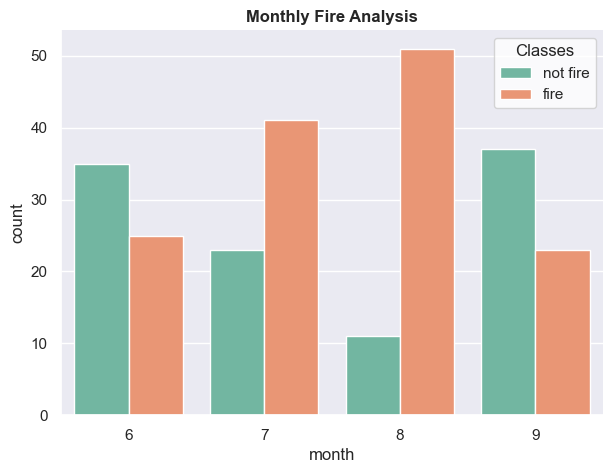

In [52]:
# Month wise fire analysis
plt.figure(figsize=(7,5))
plt.title('Monthly Fire Analysis',fontweight='bold')
sns.set_style('white')
sns.countplot(data=df,x='month',hue='Classes',palette='Set2')
sns.despine()

## Insight-
1. We can observe that Most oF the Fire happened in August.<br>
2. In June, July, August months Fire occurs the most

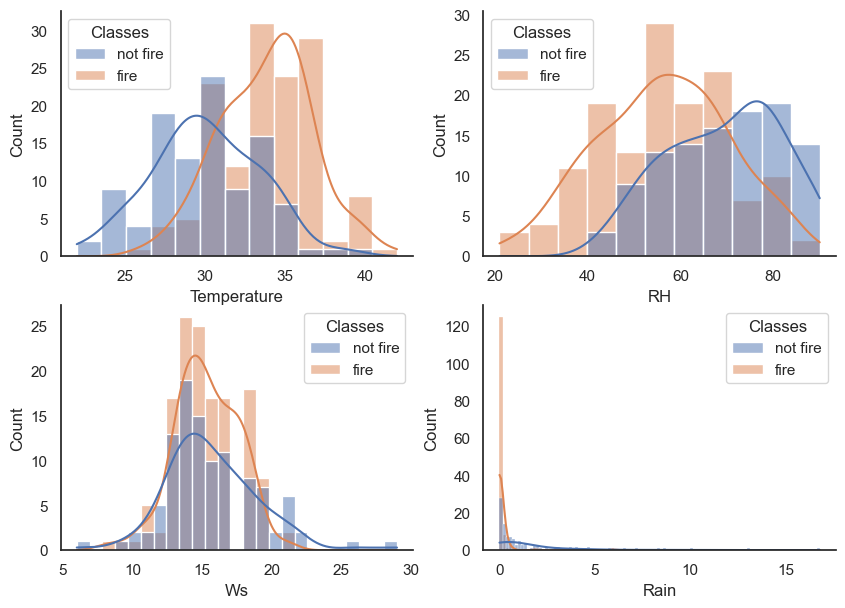

In [53]:
#Distribution of columns & Fire Analysis on different factors
sns.set_style('white')
plt.subplots(2,2,figsize= (10,7))
plt.subplot(221)
sns.histplot(data=df,
            x='Temperature',
            kde=True,hue='Classes'
            )
plt.subplot(222)
sns.histplot(data=df,
            x='RH',
            kde=True,hue='Classes')
plt.subplot(223)
sns.histplot(data=df,
            x='Ws',
            kde=True,
            hue='Classes')
plt.subplot(224)
sns.histplot(data=df,
            x='Rain',
            kde=True,
            hue='Classes')
sns.despine()

## Insight-
In Fig 1-<br>
1. As Temprature Increases,happening of Fire also increases.<br>
2. From above Fig, we observe that most of the month's temperature is between 30 to 35 which lead to more happening of fire.<br>
3. High Temperature leads to more fire<br>
4. Temperature Column is slightly left skewed distributed.<br>

In Fig 2-<br>
1. As Relative Humidity(RH) Increases,happening of Fire decreases.<br>
2. Relative Humidity(RH) leads to minimize fire rate<br>
3. Relative Humidity(RH) is slightly Right skewed distributed.<br>

In Fig 3-<br>
1. As Wind Speed(Ws) Increases,happening of Fire also increases.<br>
2. High Wind Speed(Ws) leads to more fire<br>
3. Temprature Column is slightly left skewed distributed.<br>

In Fig 4-<br>
1. As Rain Increases,happening of Fire decreases.<br>
2. From above Fig,we observe that amount of rain is less which lead to more happening of fire.<br>
3. High Rain cause to less fire<br>
4. Rain is left skewed distributed.<br>


<Axes: >

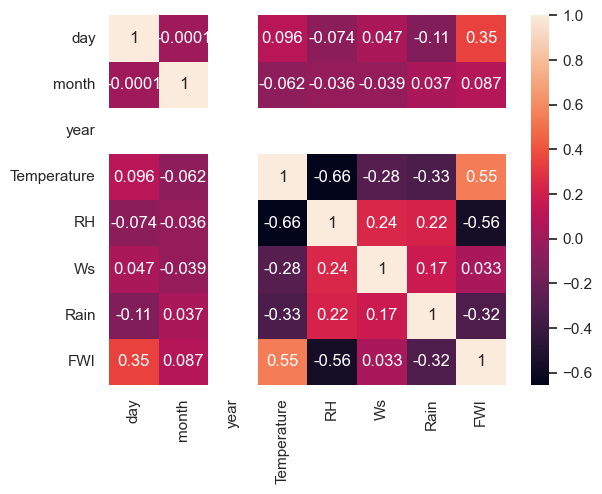

In [54]:
#correlation Between Columns
sns.heatmap(df.corr(),annot=True)

In [55]:
#percentage of fire between June to September
percentage= df['Classes'].value_counts(normalize= True)*100
percentage

fire        56.910569
not fire    43.089431
Name: Classes, dtype: float64

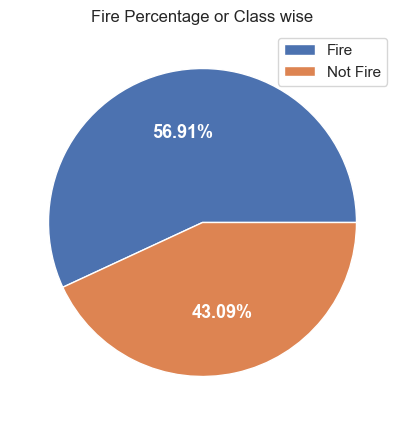

In [56]:
plt.figure(figsize=(5,5))
plt.title('Fire Percentage or Class wise')
plt.pie(percentage,
       labels= ['Fire','Not Fire'],
       autopct='%.2f%%',
       textprops = {'size':'13','fontweight':'bold','color':'w'})
plt.legend()
plt.show()

## Insights- 
Above Pie chart shows that Fire occured more than 55% in 4 months in Algerian Forest

## CONCLUSION:
As from above analysis of data,Fire occurs more in August. However months June, July, September Also impact the forest but we can conclude that at the ending of September Fire happening decreases. Algeria should take care more in July and August because most of the fire occur in that time period.